# Image Transformation for Space Invaders

In [14]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

from skimage import io, color
from skimage.transform import resize
from skimage.draw import rectangle
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
import h5py

def load_transform(image_path):
    img = io.imread(image_path)
        
    #thresh = threshold_otsu(img)
    #bw = closing(img > thresh, square(2))
    #cleared = bw
    #label_image = label(cleared)
    #for region in regionprops(label_image):
    #    if region.area >= 0 and region.area <= 70:
    #        minr, minc, maxr, maxc = region.bbox
            #rr, cc = rectangle(start=((minr+maxr)//2, (minc+maxc)//2), end=((minr+maxr)//2, (minc+maxc)//2), shape=img.shape)
            # print("rr: {}, cc: {}".format((minr+maxr)//2, (minc+maxc)//2))
    #        rr, cc = rectangle(start=(minr, minc), end=(maxr, maxc), shape=img.shape)
    #        img_empty[rr, cc] = 1

    #print(image_rescaled.shape)
    # image_reshaped = image_rescaled.reshape(3021)
    #img_empty[img_empty!=0] = 1
    return img

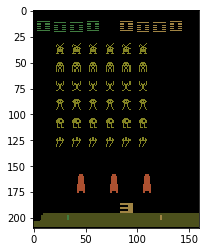

In [15]:
img = load_transform('E:\\spaceinvaders\\atari_v1\\screens\\spaceinvaders\\8\\{}.png'.format(0))
plt.imshow(img)

In [20]:
np.mean(img)

0.3608974358974359

# Auto encoder definition

In [1]:
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
# encoding_dim = 256  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
def build_deep_net():
    # this is our input placeholder
    input_img = Input(shape=(12480,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(1560, activation='relu')(input_img)
    encoded = Dense(780, activation='relu')(encoded)
    encoded = Dense(224, activation='relu')(encoded)

    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(780, activation='relu')(encoded)
    decoded = Dense(1560, activation='relu')(decoded)
    decoded = Dense(3120, activation='sigmoid')(decoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    return encoder, autoencoder

Using plaidml.keras.backend backend.


In [21]:
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
# encoding_dim = 256  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
def build_simple_net():
    # this is our input placeholder
    input_img = Input(shape=(3120,))
    encoded = Dense(224, activation='relu')(input_img)
    decoded = Dense(3120, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    return encoder, autoencoder

Using plaidml.keras.backend backend.


In [22]:
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

def build_conv_net():
    input_img = Input(shape=(120, 104, 3))  # adapt this if using `channels_first` image data format

    x = Conv2D(32, (8, 8), activation='relu', padding='same')(input_img) #nb_filter, nb_row, nb_col
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (8, 8), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(4, (8, 8), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(4, (8, 8), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (8, 8), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x) 

    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    return encoder, autoencoder

In [5]:
import os
import time

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

def build_conv_net2():
    input_img = Input(shape=(60, 52, 1))  # adapt this if using `channels_first` image data format

    x = Conv2D(16, (8, 8), activation='relu', padding='same')(input_img) #nb_filter, nb_row, nb_col
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (8, 8), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (8, 8), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(8, (8, 8), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (8, 8), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x) 

    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    return encoder, autoencoder

In [3]:
import os
if not os.path.exists('D:\\transformed_data_mspacman'):
    os.makedirs('D:\\transformed_data_mspacman')

# Image loading and transformation 

In [4]:
from os import listdir, path, walk
import numpy as np
import h5py

data_path = 'E:\\mspacman\\atari_v1\\screens\\mspacman'

paths = listdir(data_path)
paths = [int(x) for x in paths]
paths.sort()
paths = [str(x) for x in paths]

for x in paths:
    print("loaded path: {}".format(x))
    current_path = path.join(data_path, x)
    image_paths = listdir(current_path)
    image_paths = [int(x[:-4]) for x in image_paths]
    image_paths.sort()
    image_paths = [str(x) + '.png' for x in image_paths]
    data_paths = [path.join(current_path, image) for image in image_paths]
    i = 0
    data = np.zeros(shape=(len(data_paths), 60, 52))
    for image in data_paths:
        data[i] = load_transform(image)
        i = i + 1
    data = data.reshape((len(data), np.prod(data.shape[1:])))
    print(data.shape)
    transformed_path = 'D:\\transformed_data_mspacman\\mspacman_{}.h5'.format(x)
    h5f = h5py.File(transformed_path)
    h5f.create_dataset('mspacman', data=data)
    h5f.close()
    print("saved path: {}".format(transformed_path))


loaded path: 8
(1569, 3120)
saved path: D:\transformed_data_mspacman\mspacman_8.h5
loaded path: 10
(1524, 3120)
saved path: D:\transformed_data_mspacman\mspacman_10.h5
loaded path: 11
(3140, 3120)
saved path: D:\transformed_data_mspacman\mspacman_11.h5
loaded path: 14
(2006, 3120)
saved path: D:\transformed_data_mspacman\mspacman_14.h5
loaded path: 35
(5018, 3120)
saved path: D:\transformed_data_mspacman\mspacman_35.h5
loaded path: 48
(2694, 3120)
saved path: D:\transformed_data_mspacman\mspacman_48.h5
loaded path: 61
(5972, 3120)
saved path: D:\transformed_data_mspacman\mspacman_61.h5
loaded path: 63
(6821, 3120)
saved path: D:\transformed_data_mspacman\mspacman_63.h5
loaded path: 66
(3297, 3120)
saved path: D:\transformed_data_mspacman\mspacman_66.h5
loaded path: 68
(4734, 3120)
saved path: D:\transformed_data_mspacman\mspacman_68.h5
loaded path: 77
(923, 3120)
saved path: D:\transformed_data_mspacman\mspacman_77.h5
loaded path: 91
(3172, 3120)
saved path: D:\transformed_data_mspacma

(320, 3120)
saved path: D:\transformed_data_mspacman\mspacman_565.h5
loaded path: 572
(4099, 3120)
saved path: D:\transformed_data_mspacman\mspacman_572.h5
loaded path: 575
(4055, 3120)
saved path: D:\transformed_data_mspacman\mspacman_575.h5
loaded path: 580
(5881, 3120)
saved path: D:\transformed_data_mspacman\mspacman_580.h5
loaded path: 582
(1094, 3120)
saved path: D:\transformed_data_mspacman\mspacman_582.h5
loaded path: 584
(6004, 3120)
saved path: D:\transformed_data_mspacman\mspacman_584.h5
loaded path: 586
(8899, 3120)
saved path: D:\transformed_data_mspacman\mspacman_586.h5
loaded path: 589
(3959, 3120)
saved path: D:\transformed_data_mspacman\mspacman_589.h5
loaded path: 592
(341, 3120)
saved path: D:\transformed_data_mspacman\mspacman_592.h5
loaded path: 598
(2112, 3120)
saved path: D:\transformed_data_mspacman\mspacman_598.h5
loaded path: 600
(3397, 3120)
saved path: D:\transformed_data_mspacman\mspacman_600.h5
loaded path: 601
(2777, 3120)
saved path: D:\transformed_data_

# Autoeconder training

In [26]:
import numpy as np

from os import listdir, path, walk, path
import numpy as np
import h5py
import re

regex = re.compile('\d+')

data_path = 'D:\\transformed_data_4'

paths = listdir(data_path)
numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
numbers.sort()
paths = ['{}{}{}'.format('space_invaders_', x, '.h5') for x in numbers]
dataset = np.zeros(shape=(0,3120))
i = 0
for x in paths:
    data = path.join(data_path, x)
    print("loaded path: {}".format(data))
    h5f = h5py.File(data, 'r')
    dataset =  np.vstack([dataset, h5f['space_invaders'][:]])
    i = i + 1
    if i >= 90:
        break
print(dataset.shape)

loaded path: D:\transformed_data_4\space_invaders_1.h5
loaded path: D:\transformed_data_4\space_invaders_2.h5
loaded path: D:\transformed_data_4\space_invaders_3.h5
loaded path: D:\transformed_data_4\space_invaders_4.h5
loaded path: D:\transformed_data_4\space_invaders_5.h5
loaded path: D:\transformed_data_4\space_invaders_6.h5
loaded path: D:\transformed_data_4\space_invaders_7.h5
loaded path: D:\transformed_data_4\space_invaders_8.h5
loaded path: D:\transformed_data_4\space_invaders_9.h5
loaded path: D:\transformed_data_4\space_invaders_10.h5
loaded path: D:\transformed_data_4\space_invaders_12.h5
loaded path: D:\transformed_data_4\space_invaders_13.h5
loaded path: D:\transformed_data_4\space_invaders_14.h5
loaded path: D:\transformed_data_4\space_invaders_15.h5
loaded path: D:\transformed_data_4\space_invaders_16.h5
loaded path: D:\transformed_data_4\space_invaders_17.h5
loaded path: D:\transformed_data_4\space_invaders_20.h5
loaded path: D:\transformed_data_4\space_invaders_21.h5
l

In [27]:
dataset = dataset.reshape(len(dataset), 3120)

dataset = dataset.reshape(len(dataset), 60, 52, 1)

In [30]:
num_to_load = len(dataset)
split = int(num_to_load * 0.8)


x_train = dataset[0:split]
x_test = dataset[split:]

# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(288680, 60, 52, 1)
(72171, 60, 52, 1)


In [31]:
encoder, autoencoder = build_conv_net()

In [32]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 60, 52, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 52, 16)        1040      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 26, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 26, 8)         8200      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 13, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 13, 4)         2052      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 7, 4)           0         
__________

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 288680 samples, validate on 72171 samples
Epoch 1/50
288640/288680 [============================>.] - ETA: 0s - loss: 0.1034

INFO:plaidml:Analyzing Ops: 105 of 431 operations complete


288680/288680 [==============================] - 195s 677us/step - loss: 0.1034 - val_loss: 0.0565
Epoch 2/50
288680/288680 [==============================] - 179s 620us/step - loss: 0.0549 - val_loss: 0.0506
Epoch 3/50
288680/288680 [==============================] - 179s 620us/step - loss: 0.0487 - val_loss: 0.0445
Epoch 4/50
288680/288680 [==============================] - 174s 602us/step - loss: 0.0448 - val_loss: 0.0426
Epoch 5/50
288680/288680 [==============================] - 173s 600us/step - loss: 0.0424 - val_loss: 0.0387
Epoch 6/50
288680/288680 [==============================] - 173s 599us/step - loss: 0.0406 - val_loss: 0.0389
Epoch 7/50
288680/288680 [==============================] - 172s 598us/step - loss: 0.0393 - val_loss: 0.0360
Epoch 8/50
288680/288680 [==============================] - 173s 599us/step - loss: 0.0380 - val_loss: 0.0359
Epoch 9/50
288680/288680 [==============================] - 171s 593us/step - loss: 0.0370 - val_loss: 0.0353
Epoch 10/50
216576/28

In [ ]:
autoenc

In [17]:
history = []

for i in range(0, 5):
    print("start: {}".format(i))
    # this is our input placeholder
    input_img = Input(shape=(3021,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(1510, activation='relu')(input_img)
    encoded = Dense(755, activation='relu')(encoded)
    encoded = Dense(100, activation='relu')(encoded)

    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(755, activation='relu')(encoded)
    decoded = Dense(1510, activation='relu')(decoded)
    decoded = Dense(3021, activation='sigmoid')(decoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    print("training: {}".format(i))
    history.append(autoencoder.fit(x_train, x_train,
                                   epochs=25,
                                   batch_size=128,
                                   shuffle=True,
                                   validation_data=(x_test, x_test),
                                   verbose=0))
    print("done: {}".format(i))

start: 0
training: 0
done: 0
start: 1
training: 1
done: 1
start: 2
training: 2
done: 2
start: 3
training: 3
done: 3
start: 4
training: 4
done: 4


In [6]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


In [25]:
import matplotlib.pyplot as plt

def plot_history(history, name):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(name)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(name, bbox_inches='tight')
    plt.show()

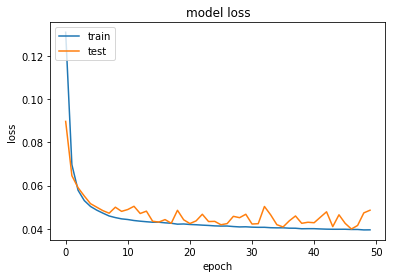

In [42]:
plot_history(history, 'D:\\results\\graphs\\conv_net_50_epoch_4.svg')

# Encode all images

In [1]:
from os import listdir, path, walk, path
import numpy as np
import h5py

data_path = '/media/andres/Baymax/transformed_data_2/'

from keras.models import load_model

model = load_model('/media/andres/Baymax/encoder100_6.h5')
paths = listdir(data_path)

for x in paths:
    print("loaded path: {}".format(x))
    current_path = path.join(data_path, x)
    h5f = h5py.File(current_path, 'r')
    data = h5f['space_invaders'][:]
    result = model.predict(data)
    print(result.shape)
    save_path = path.join('/media/andres/Baymax/encoded_100_6/', x)
    h5f = h5py.File(save_path)
    h5f.create_dataset('space_invaders', data=result)
    h5f.close()
    print("saved path: {}".format(save_path))


Using TensorFlow backend.
/home/andres/thesis_project/keras2/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


loaded path: space_invaders_1.h5
(1100, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_1.h5
loaded path: space_invaders_10.h5
(1426, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_10.h5
loaded path: space_invaders_101.h5
(4165, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_101.h5
loaded path: space_invaders_102.h5
(4749, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_102.h5
loaded path: space_invaders_103.h5
(3882, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_103.h5
loaded path: space_invaders_104.h5
(4897, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_104.h5
loaded path: space_invaders_105.h5
(3252, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_105.h5
loaded path: space_invaders_106.h5
(5055, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_106.h5
loaded path: space_invaders_107.h5
(7323, 100)
saved path: /media/andres/Bayma

(2732, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_90.h5
loaded path: space_invaders_93.h5
(3060, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_93.h5
loaded path: space_invaders_94.h5
(4300, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_94.h5
loaded path: space_invaders_95.h5
(4789, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_95.h5
loaded path: space_invaders_96.h5
(4863, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_96.h5
loaded path: space_invaders_114.h5
(3316, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_114.h5
loaded path: space_invaders_131.h5
(3970, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_131.h5
loaded path: space_invaders_150.h5
(3786, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_150.h5
loaded path: space_invaders_177.h5
(4648, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_177.h5


(5430, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_168.h5
loaded path: space_invaders_17.h5
(4000, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_17.h5
loaded path: space_invaders_178.h5
(3947, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_178.h5
loaded path: space_invaders_179.h5
(4227, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_179.h5
loaded path: space_invaders_180.h5
(3657, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_180.h5
loaded path: space_invaders_181.h5
(4852, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_181.h5
loaded path: space_invaders_182.h5
(4374, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_182.h5
loaded path: space_invaders_183.h5
(4601, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_183.h5
loaded path: space_invaders_186.h5
(322, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_1

(4798, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_267.h5
loaded path: space_invaders_268.h5
(4355, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_268.h5
loaded path: space_invaders_269.h5
(4561, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_269.h5
loaded path: space_invaders_27.h5
(458, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_27.h5
loaded path: space_invaders_270.h5
(3538, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_270.h5
loaded path: space_invaders_271.h5
(4012, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_271.h5
loaded path: space_invaders_273.h5
(3505, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_273.h5
loaded path: space_invaders_274.h5
(3978, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_274.h5
loaded path: space_invaders_275.h5
(5259, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_2

(3857, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_363.h5
loaded path: space_invaders_364.h5
(3662, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_364.h5
loaded path: space_invaders_365.h5
(3390, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_365.h5
loaded path: space_invaders_366.h5
(2309, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_366.h5
loaded path: space_invaders_367.h5
(4228, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_367.h5
loaded path: space_invaders_368.h5
(3546, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_368.h5
loaded path: space_invaders_369.h5
(3064, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_369.h5
loaded path: space_invaders_370.h5
(3351, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_370.h5
loaded path: space_invaders_371.h5
(1914, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invader

(3436, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_434.h5
loaded path: space_invaders_435.h5
(5178, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_435.h5
loaded path: space_invaders_436.h5
(5185, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_436.h5
loaded path: space_invaders_437.h5
(10254, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_437.h5
loaded path: space_invaders_438.h5
(6104, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_438.h5
loaded path: space_invaders_439.h5
(3387, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_439.h5
loaded path: space_invaders_44.h5
(2364, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_44.h5
loaded path: space_invaders_440.h5
(4050, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders_440.h5
loaded path: space_invaders_441.h5
(4622, 100)
saved path: /media/andres/Baymax/encoded_100_6/space_invaders

# Classifier

In [28]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Model, Sequential




# this is the size of our encoded representations
# encoding_dim = 256  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder\
# adapt this if using `channels_first` image data format
model = Sequential()
model.add(Conv2D(16, (8, 8), activation='relu', padding='same', input_shape=(60, 52, 1))) #nb_filter, nb_row, nb_col
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (8, 8), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(4, (8, 8), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(18, activation='softmax'))

#predictor_model = Model(input_array, predictor)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 52, 16)        1040      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 26, 8)         8200      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 13, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 13, 4)         2052      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 7, 4)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 224)               0         
__________

# Load Encoded Images

In [2]:
from os import listdir, path, walk, path
import numpy as np
import h5py
import re

regex = re.compile('\d+')

data_path = '/media/andres/Baymax/encoded_100/'

paths = listdir(data_path)
numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
numbers.sort()
paths = ['{}{}{}'.format('space_invaders_', x, '.h5') for x in numbers]
x_dataset = np.zeros(shape=(0,100))
i = 0
for x in paths:
    print("loaded path: {}".format(x))
    data = path.join(data_path, x)
    h5f = h5py.File(data, 'r')
    x_dataset =  np.vstack([x_dataset, h5f['space_invaders'][:]])
    i = i + 1
    if i >= 400:
        break
print(x_dataset.shape)


loaded path: space_invaders_1.h5
loaded path: space_invaders_2.h5
loaded path: space_invaders_3.h5
loaded path: space_invaders_4.h5
loaded path: space_invaders_5.h5
loaded path: space_invaders_6.h5
loaded path: space_invaders_7.h5
loaded path: space_invaders_8.h5
loaded path: space_invaders_9.h5
loaded path: space_invaders_10.h5
loaded path: space_invaders_12.h5
loaded path: space_invaders_13.h5
loaded path: space_invaders_14.h5
loaded path: space_invaders_15.h5
loaded path: space_invaders_16.h5
loaded path: space_invaders_17.h5
loaded path: space_invaders_20.h5
loaded path: space_invaders_21.h5
loaded path: space_invaders_22.h5
loaded path: space_invaders_23.h5
loaded path: space_invaders_27.h5
loaded path: space_invaders_32.h5
loaded path: space_invaders_33.h5
loaded path: space_invaders_34.h5
loaded path: space_invaders_35.h5
loaded path: space_invaders_36.h5
loaded path: space_invaders_37.h5
loaded path: space_invaders_38.h5
loaded path: space_invaders_39.h5
loaded path: space_inva

loaded path: space_invaders_305.h5
loaded path: space_invaders_306.h5
loaded path: space_invaders_308.h5
loaded path: space_invaders_309.h5
loaded path: space_invaders_310.h5
loaded path: space_invaders_311.h5
loaded path: space_invaders_312.h5
loaded path: space_invaders_313.h5
loaded path: space_invaders_314.h5
loaded path: space_invaders_315.h5
loaded path: space_invaders_316.h5
loaded path: space_invaders_317.h5
loaded path: space_invaders_318.h5
loaded path: space_invaders_319.h5
loaded path: space_invaders_322.h5
loaded path: space_invaders_323.h5
loaded path: space_invaders_324.h5
loaded path: space_invaders_325.h5
loaded path: space_invaders_327.h5
loaded path: space_invaders_328.h5
loaded path: space_invaders_329.h5
loaded path: space_invaders_330.h5
loaded path: space_invaders_331.h5
loaded path: space_invaders_332.h5
loaded path: space_invaders_333.h5
loaded path: space_invaders_334.h5
loaded path: space_invaders_335.h5
loaded path: space_invaders_336.h5
loaded path: space_i

In [33]:
x_dataset = dataset

In [37]:
import pandas as pd
import os
regex = re.compile('\d+')

data_path = 'E:\\spaceinvaders\\atari_v1\\trajectories\\spaceinvaders'

paths = listdir(data_path)
numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
numbers.sort()
paths = ['{}.txt'.format(x, '.txt') for x in numbers]
y_dataset = np.zeros(shape=(0,18))
i = 0
for x in paths:
    print("loaded path: {}".format(x))
    full_path = os.path.join(data_path, x)
    data = pd.read_csv(full_path, skiprows=1)
    data.columns = ['frame', 'reward', 'score', 'terminal', 'action']
    a = data['action'].values
    b = np.zeros((a.size, 18))
    b[np.arange(a.size), a] = 1
    y_dataset = np.vstack([y_dataset, b])
    i = i + 1
    if i >= 88:
        break
print(y_dataset.shape)

loaded path: 1.txt
loaded path: 2.txt
loaded path: 3.txt
loaded path: 4.txt
loaded path: 5.txt
loaded path: 6.txt
loaded path: 7.txt
loaded path: 8.txt
loaded path: 9.txt
loaded path: 10.txt
loaded path: 12.txt
loaded path: 13.txt
loaded path: 14.txt
loaded path: 15.txt
loaded path: 16.txt
loaded path: 17.txt
loaded path: 20.txt
loaded path: 21.txt
loaded path: 22.txt
loaded path: 23.txt
loaded path: 27.txt
loaded path: 32.txt
loaded path: 33.txt
loaded path: 34.txt
loaded path: 35.txt
loaded path: 36.txt
loaded path: 37.txt
loaded path: 38.txt
loaded path: 39.txt
loaded path: 40.txt
loaded path: 41.txt
loaded path: 42.txt
loaded path: 43.txt
loaded path: 44.txt
loaded path: 45.txt
loaded path: 46.txt
loaded path: 48.txt
loaded path: 49.txt
loaded path: 50.txt
loaded path: 51.txt
loaded path: 52.txt
loaded path: 53.txt
loaded path: 54.txt
loaded path: 55.txt
loaded path: 56.txt
loaded path: 57.txt
loaded path: 58.txt
loaded path: 59.txt
loaded path: 60.txt
loaded path: 61.txt
loaded pa

In [19]:
dataset = np.concatenate((x_dataset, y_dataset), axis=1)
dataset = dataset[dataset[:,100]!=1]

ValueError: all the input arrays must have same number of dimensions

In [21]:
y_dataset

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [6]:
datasets = np.split(dataset, [0,100], axis=1)
datasets[2].shape

x_dataset = datasets[1]
y_dataset = datasets[2]

for i in range(0, len(x_dataset)):
    x_dataset[i] = x_dataset[i]/x_dataset[i].sum()

x_dataset.shape

(885325, 100)

In [38]:
num_to_load = len(x_dataset)
split = int(num_to_load * 0.8)


x_train = x_dataset[0:split]
y_train = y_dataset[0:split]
x_test = x_dataset[split:]
y_test = y_dataset[split:]

# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288680, 60, 52, 1)
(72171, 60, 52, 1)
(288680, 18)
(72171, 18)


In [39]:
model.fit(x_train, y_train,
          epochs=5,
          batch_size=32,
          shuffle=True,
          validation_data=(x_test, y_test))

Train on 288680 samples, validate on 72171 samples
Epoch 1/5
288680/288680 [==============================] - 164s 567us/step - loss: 1.2189 - acc: 0.5287 - val_loss: 1.5072 - val_acc: 0.4318
Epoch 2/5
288680/288680 [==============================] - 157s 545us/step - loss: 1.0870 - acc: 0.5810 - val_loss: 1.5876 - val_acc: 0.4053
Epoch 3/5
288680/288680 [==============================] - 156s 540us/step - loss: 1.0328 - acc: 0.6046 - val_loss: 1.6604 - val_acc: 0.3949
Epoch 4/5
288680/288680 [==============================] - 157s 545us/step - loss: 1.0010 - acc: 0.6176 - val_loss: 1.8221 - val_acc: 0.4065
Epoch 5/5
288680/288680 [==============================] - 156s 541us/step - loss: 0.9801 - acc: 0.6274 - val_loss: 1.7721 - val_acc: 0.3968


In [11]:
predictor_model.save('/media/andres/Baymax/predictor_6.h5')

In [41]:


result = model.predict(x_test)

print(result[0].argmax())
print(result[0])
print(result[0][result[0].argmax()])
print(result[0].max())

0
[8.1276375e-01 6.7214914e-02 4.2488851e-04 7.6373167e-02 3.8588338e-02
 1.5969843e-09 7.2299451e-07 1.4380296e-07 3.1285505e-11 2.1485559e-18
 6.9693121e-15 3.6267983e-03 1.0071570e-03 7.5320077e-11 6.2774274e-12
 3.6418650e-12 3.9342427e-12 1.3623114e-12]
0.81276375
0.81276375


In [ ]:
for i in to_remove:
    y_dataset = np.delete(y_dataset, i)
    x_dataset = np.delete(x_dataset, i)

In [42]:
import heapq

misses = 0
hits = 0

for i in range(0, len(result)):
    test = heapq.nlargest(3, range(0,len(result[i])), key=result[i].__getitem__)
    if y_test[i][test[0]] == 1 or y_test[i][test[1]] == 1 or y_test[i][test[2]] == 1:
        hits = hits + 1
    else:
        misses = misses + 1
        
print("hits: {}".format(hits))
print("misses: {}".format(misses))
print("precission: {}".format(hits/(hits+misses)))

hits: 58703
misses: 13468
precission: 0.8133876487785953


In [43]:
total = len(y_dataset)
for i in range(0, 18):
    count = 0
    for y in y_dataset:
        if y[i] == 1:
            count = count + 1
    print("total samples of class {}: {} - {:.2f}%".format(i, count, (count/total)*100))

total samples of class 0: 175018 - 48.50%
total samples of class 1: 49926 - 13.84%
total samples of class 2: 293 - 0.08%
total samples of class 3: 69690 - 19.31%
total samples of class 4: 53237 - 14.75%
total samples of class 5: 65 - 0.02%
total samples of class 6: 49 - 0.01%
total samples of class 7: 30 - 0.01%
total samples of class 8: 18 - 0.00%
total samples of class 9: 6 - 0.00%
total samples of class 10: 5 - 0.00%
total samples of class 11: 7010 - 1.94%
total samples of class 12: 5445 - 1.51%
total samples of class 13: 1 - 0.00%
total samples of class 14: 0 - 0.00%
total samples of class 15: 0 - 0.00%
total samples of class 16: 58 - 0.02%
total samples of class 17: 0 - 0.00%


In [8]:
total = len(y_train)
for i in range(0, 18):
    count = 0
    for y in y_train:
        if y[i] == 1:
            count = count + 1
    print("total samples of class {}: {} - {:.2f}%".format(i, count, (count/total)*100))

total samples of class 0: 0 - 0.00%
total samples of class 1: 71261 - 27.20%
total samples of class 2: 348 - 0.13%
total samples of class 3: 98568 - 37.62%
total samples of class 4: 75975 - 29.00%
total samples of class 5: 79 - 0.03%
total samples of class 6: 50 - 0.02%
total samples of class 7: 30 - 0.01%
total samples of class 8: 18 - 0.01%
total samples of class 9: 6 - 0.00%
total samples of class 10: 5 - 0.00%
total samples of class 11: 8966 - 3.42%
total samples of class 12: 6631 - 2.53%
total samples of class 13: 1 - 0.00%
total samples of class 14: 0 - 0.00%
total samples of class 15: 0 - 0.00%
total samples of class 16: 58 - 0.02%
total samples of class 17: 0 - 0.00%


In [19]:
total = len(y_test)
for i in range(0, 18):
    count = 0
    for y in y_test:
        if y[i] == 1:
            count = count + 1
    print("total samples of class {}: {} - {:.2f}%".format(i, count, (count/total)*100))

total samples of class 0: 166017 - 47.00%
total samples of class 1: 60981 - 17.26%
total samples of class 2: 105 - 0.03%
total samples of class 3: 64044 - 18.13%
total samples of class 4: 48614 - 13.76%
total samples of class 5: 27 - 0.01%
total samples of class 6: 24 - 0.01%
total samples of class 7: 2 - 0.00%
total samples of class 8: 15 - 0.00%
total samples of class 9: 1 - 0.00%
total samples of class 10: 0 - 0.00%
total samples of class 11: 7898 - 2.24%
total samples of class 12: 5485 - 1.55%
total samples of class 13: 3 - 0.00%
total samples of class 14: 0 - 0.00%
total samples of class 15: 0 - 0.00%
total samples of class 16: 0 - 0.00%
total samples of class 17: 0 - 0.00%


In [52]:
len(sequence_train.paths) + len(sequence_validation.paths)

1766078

In [ ]:
autoencoder.fit_generator(generator=sequence_train, 
                          epochs=80,
                          validation_data=sequence_validation,
                          max_queue_size=10,
                          workers=4,
                          use_multiprocessing=True)


Epoch 1/80


/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/andres/thesis/keras/lib/python3.6/site-packages/skimage/transf

  12/1379 [..............................] - ETA: 17:10:05 - loss: 0.6909

In [17]:
predictor_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 377)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 188)               71064     
_________________________________________________________________
dense_2 (Dense)              (None, 47)                8883      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                864       
Total params: 80,811
Trainable params: 80,811
Non-trainable params: 0
_________________________________________________________________


In [74]:
len(a)

377

In [3]:
import numpy as np
from random import randint
train_x = np.random.rand(10000,377)
train_y = np.zeros((10000, 18))

In [4]:
for row in train_y:
    row[0] = 1

In [77]:
train_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
predictor_model.fit(train_x, train_y,
                epochs=50,
                batch_size=10,
                shuffle=True,
                validation_data=(train_x, train_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 2s 190us/step - loss: 8.8349e-04 - val_loss: 1.6077e-06
Epoch 2/50
10000/10000 [==============================] - 2s 175us/step - loss: 1.0824e-06 - val_loss: 7.6943e-07
Epoch 3/50
10000/10000 [==============================] - 2s 174us/step - loss: 6.2807e-07 - val_loss: 5.2232e-07
Epoch 4/50
10000/10000 [==============================] - 2s 180us/step - loss: 4.5799e-07 - val_loss: 4.0547e-07
Epoch 5/50
10000/10000 [==============================] - 2s 171us/step - loss: 3.6890e-07 - val_loss: 3.3763e-07
Epoch 6/50
10000/10000 [==============================] - 2s 175us/step - loss: 3.1426e-07 - val_loss: 2.9366e-07
Epoch 7/50
10000/10000 [==============================] - 2s 172us/step - loss: 2.7738e-07 - val_loss: 2.6272e-07
Epoch 8/50
10000/10000 [==============================] - 2s 166us/step - loss: 2.5080e-07 - val_loss: 2.3994e-07
Epoch 9/50
10000/10000 [==============

In [12]:
result = predictor_model.predict(train_x)

In [13]:
result[0]

array([ 0.9999999 , -0.52402663, -0.78376174, -0.99066645, -0.82346517,
       -0.7911382 , -0.8860826 , -0.8925584 , -0.86585486, -0.7716998 ,
       -0.9347379 , -0.7225369 , -0.9952648 , -0.46945217, -0.9444944 ,
       -0.92316824, -0.9827192 , -0.8370023 ], dtype=float32)

In [54]:
train_y[0]

array([11.])

In [29]:
a

array([0.96464172, 0.0374102 , 0.06367769, 0.43808396, 0.33149993,
       0.6639806 , 0.89277104, 0.67845068, 0.3646353 , 0.25952953,
       0.26613748, 0.35238901, 0.64176481, 0.45047746, 0.56789687,
       0.00919414, 0.1303084 , 0.72539952, 0.3321035 , 0.88052515,
       0.34029707, 0.50018285, 0.2087765 , 0.26215716, 0.22870178,
       0.23009559, 0.45292584, 0.70454599, 0.87002428, 0.34197075,
       0.13441189, 0.22718142, 0.71868584, 0.33989796, 0.54064392,
       0.87639121, 0.8484391 , 0.67377135, 0.57060809, 0.68338729,
       0.02014656, 0.47815473, 0.92303769, 0.24825419, 0.27910188,
       0.79125838, 0.51276072, 0.21473458, 0.6918284 , 0.55021233,
       0.2991266 , 0.53690291, 0.50489642, 0.80614165, 0.79154076,
       0.15664683, 0.02441173, 0.93479568, 0.53164814, 0.26176709,
       0.25848321, 0.16895805, 0.55590089, 0.13986689, 0.86039142,
       0.14204966, 0.79149357, 0.79116753, 0.57280507, 0.35333719,
       0.58120717, 0.22440114, 0.37798431, 0.5543642 , 0.29560

In [21]:
len(['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'UPRIGHT', 'UPLEFT', 'DOWNRIGHT', 'DOWNLEFT', 'UPFIRE', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE'])

18

In [19]:
result = autoencoder.predict(np.expand_dims(dataset[13], axis=0))[0]

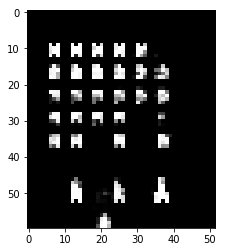

In [20]:
plt.imshow(result.reshape(60, 52), cmap=cm.gray)

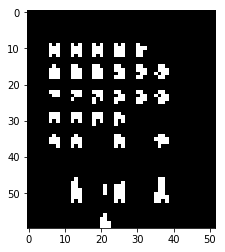

In [18]:
plt.imshow(dataset[13].reshape(60, 52), cmap=cm.gray)

In [30]:
b

array([[1, 0, 0],
       [0, 1, 0]])

In [36]:
result = np.concatenate((a,b), axis=1)

In [52]:
result[result[:,3]!=1]

array([[1, 2, 3, 0, 1, 0]])

In [42]:
a[a[:,0] > 3]

[[ 1  0  5  7  8]
 [11 13 15 17 18]]


In [9]:
import itertools
import random
factors = {
    'names': ['net_type', 'batch_size'],
    'net_type': [build_conv_net, build_conv_net2],#, build_deep_net, build_simple_net],
    'batch_size': [128, 256]
}

def generate_experiments(factors, repetitions):
    randomized = []
    for factor_name in factors['names']:
        randomized.append(factors[factor_name])
    experiments_permutations = list(itertools.product(*randomized))*repetitions
    return random.sample(experiments_permutations, len(experiments_permutations))

In [ ]:
import h5py
import numpy as np

np.random.shuffle(dataset)

i = 0
for experiment in generate_experiments(factors, 4):
    print("Running experiment: {} - net: {} batch_size: {}".format(i, experiment[0].__name__, experiment[1]))
    # Reshape
    if experiment[0] == build_conv_net or experiment[0] == build_conv_net2:
        dataset = dataset.reshape(len(dataset), 60, 52, 1)
    else:
        dataset = dataset.reshape(len(dataset), 3120)
    # Split
    num_to_load = len(dataset)
    split = int(num_to_load * 0.8)
    x_train = dataset[0:split]
    x_test = dataset[split:]
    encoder, autoencoder = experiment[0]()
    # train
    history = autoencoder.fit(x_train, x_train,
                epochs=70,
                batch_size=experiment[1],
                shuffle=True,
                validation_data=(x_test, x_test))
    h5f = h5py.File('D:\\results_2\\experiments_data\\{}_{}_{}.h5'.format(experiment[0].__name__, experiment[1], i))
    h5f.create_dataset('val_loss', data=history.history['val_loss'])
    h5f.create_dataset('loss', data=history.history['loss'])
    h5f.close()
    i = i + 1

Running experiment: 0 - net: build_conv_net2 batch_size: 256


INFO:plaidml:Opening device "opencl_amd_hawaii.0"


Train on 288680 samples, validate on 72171 samples
Epoch 1/70


INFO:plaidml:Analyzing Ops: 324 of 431 operations complete


288512/288680 [============================>.] - ETA: 0s - loss: 0.1402

INFO:plaidml:Analyzing Ops: 419 of 431 operations complete


288680/288680 [==============================] - 181s 627us/step - loss: 0.1402 - val_loss: 0.0699
Epoch 2/70
 19712/288680 [=>............................] - ETA: 2:21 - loss: 0.0680

In [4]:
build_conv_net()[1].summary()

INFO:plaidml:Opening device "opencl_amd_hawaii.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 52, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 52, 8)         520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 26, 8)         4104      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 13, 2)         1026      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 7, 2)           0         
__________

In [5]:
build_deep_net()[1].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3120)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1560)              4868760   
_________________________________________________________________
dense_2 (Dense)              (None, 780)               1217580   
_________________________________________________________________
dense_3 (Dense)              (None, 224)               174944    
_________________________________________________________________
dense_4 (Dense)              (None, 780)               175500    
_________________________________________________________________
dense_5 (Dense)              (None, 1560)              1218360   
_________________________________________________________________
dense_6 (Dense)              (None, 3120)              4870320   
Total para

In [10]:
build_simple_net()[1].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3120)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 224)               699104    
_________________________________________________________________
dense_11 (Dense)             (None, 3120)              702000    
Total params: 1,401,104
Trainable params: 1,401,104
Non-trainable params: 0
_________________________________________________________________


In [7]:
import numpy as np
import os
import h5py

path = "D:\\results\\experiments_data\\"
files = os.listdir(path)

conv_128 = [path + file for file in files if 'conv_net_128' in file]
conv_64 = [path + file for file in files if 'conv_net_64' in file]

deep_128 = [path + file for file in files if 'deep_net_128' in file]
deep_64 = [path + file for file in files if 'deep_net_64' in file]

simple_128 = [path + file for file in files if 'simple_net_128' in file]
simple_64 = [path + file for file in files if 'simple_net_64' in file]

In [21]:
def avg_h5py(list_of_files):
    loss = np.zeros((len(list_of_files), 30))
    val_loss = np.zeros((len(list_of_files), 30))
    for i in range(0, len(list_of_files)):
        loss[i] = h5py.File(list_of_files[i], 'r')['loss']
        val_loss[i] = h5py.File(list_of_files[i], 'r')['val_loss']
        return np.mean(loss, axis=0), np.mean(val_loss, axis=0)

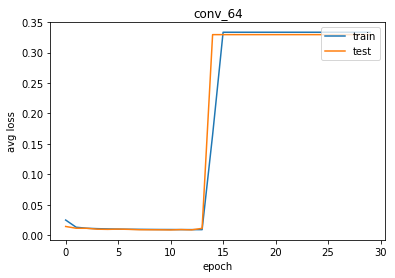

loss min: 0.009006360539228061 at epoch: 14
val_loss min: 0.008565520530858246 at epoch: 11


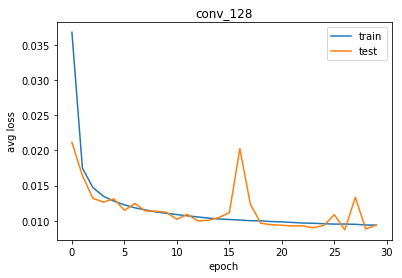

loss min: 0.00938949703388199 at epoch: 30
val_loss min: 0.008712826753964748 at epoch: 27


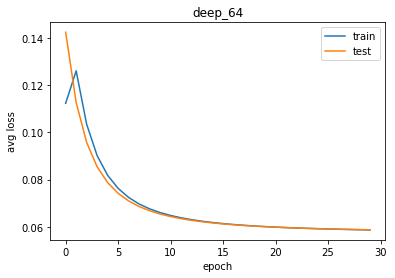

loss min: 0.05870854213072088 at epoch: 30
val_loss min: 0.05875367279504662 at epoch: 30


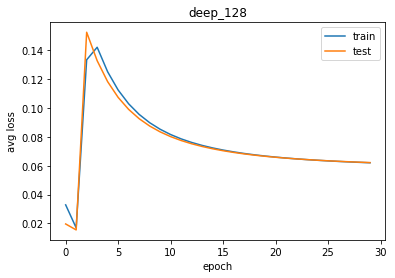

loss min: 0.016960288159045104 at epoch: 2
val_loss min: 0.015516104998064953 at epoch: 2


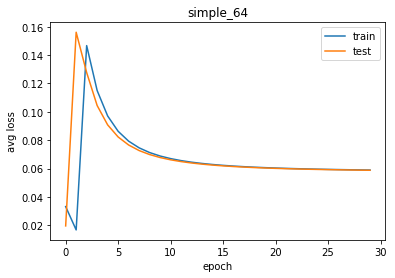

loss min: 0.016783708503536027 at epoch: 2
val_loss min: 0.01961068443889194 at epoch: 1


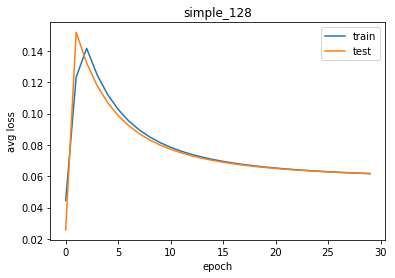

loss min: 0.04442331105236174 at epoch: 1
val_loss min: 0.02568934154313707 at epoch: 1


In [32]:
list_results = [conv_64, conv_128, deep_64, deep_128, simple_64, simple_128]
list_results_names = ['conv_64', 'conv_128', 'deep_64', 'deep_128', 'simple_64', 'simple_128']

for i in range(0, len(list_results)):
    loss, val_loss = avg_h5py(list_results[i])
    plot_history(loss, val_loss, list_results_names[i])
    print("loss min: {} at epoch: {}".format(np.amin(loss), np.argmin(loss)+1))
    print("val_loss min: {} at epoch: {}".format(np.amin(val_loss), np.argmin(val_loss)+1))

In [8]:
import matplotlib.pyplot as plt
import os

def plot_history(loss, val_loss, name):
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title(name)
    plt.ylabel('avg loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.savefig(os.path.join("D:\\results\\graphs", "{}.svg".format(name)), bbox_inches='tight')
    plt.show()

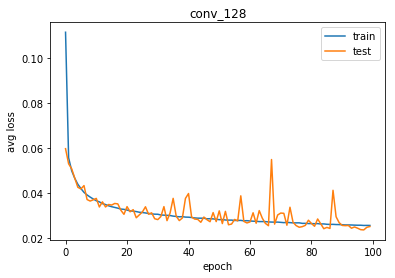

In [9]:
plot_history(history.history['loss'], history.history['val_loss'], 'conv_128')

In [25]:
conv_128.__name__

AttributeError: 'list' object has no attribute '__name__'

In [27]:
np.argmin(np.zeros)

0

In [6]:
encoder, autoencoder = build_conv_net()

In [7]:
#dataset = dataset.reshape(len(dataset), 60, 52, 1)
#np.random.shuffle(dataset)

#num_to_load = len(dataset)
#split = int(num_to_load * 0.8)
#x_train = dataset[0:split]
#x_test = dataset[split:]

history = autoencoder.fit(x_train, x_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Train on 288680 samples, validate on 72171 samples
Epoch 1/100


INFO:plaidml:Analyzing Ops: 105 of 431 operations complete


288680/288680 [==============================] - 182s 630us/step - loss: 0.1117 - val_loss: 0.0598
Epoch 2/100
288680/288680 [==============================] - 163s 564us/step - loss: 0.0557 - val_loss: 0.0530
Epoch 3/100
288680/288680 [==============================] - 161s 556us/step - loss: 0.0499 - val_loss: 0.0508
Epoch 4/100
288680/288680 [==============================] - 161s 558us/step - loss: 0.0466 - val_loss: 0.0466
Epoch 5/100
288680/288680 [==============================] - 161s 557us/step - loss: 0.0439 - val_loss: 0.0426
Epoch 6/100
288680/288680 [==============================] - 162s 560us/step - loss: 0.0420 - val_loss: 0.0418
Epoch 7/100
288680/288680 [==============================] - 161s 558us/step - loss: 0.0403 - val_loss: 0.0433
Epoch 8/100
288680/288680 [==============================] - 161s 558us/step - loss: 0.0392 - val_loss: 0.0371
Epoch 9/100
288680/288680 [==============================] - 161s 558us/step - loss: 0.0382 - val_loss: 0.0364
Epoch 10/100


In [26]:
encoder.save('D:\\conv_encoder_50_128_3.h5')
autoencoder.save('D:\\conv_autoencoder_50_128_2.h5')

In [21]:
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Model, Sequential
import sys
import h5py
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from os import listdir, path, walk
import re

def classifier():
    # this is the size of our encoded representations
    # encoding_dim = 256  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

    # this is our input placeholder\
    # adapt this if using `channels_first` image data format
    model = Sequential()
    model.add(Conv2D(64, (8, 8), activation='relu', padding='same', input_shape=(60, 52, 1))) #nb_filter, nb_row, nb_col
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(32, (8, 8), activation='relu', padding='same')) #nb_filter, nb_row, nb_col
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(16, (8, 8), activation='relu', padding='same')) #nb_filter, nb_row, nb_col
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(8, (8, 8), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(18, activation='softmax'))

    #predictor_model = Model(input_array, predictor)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)


In [22]:
if __name__ == "__main__":
    simple_net = classifier()
    root_folder = 'E:\\for_conv_net\\pinball'
    output_folder = 'E:\\conv_net_classifier_complete_data_set'
    dataset_name = 'pinball'
    trajectories = 'E:\\pinball\\atari_v1\\trajectories\\pinball'
    regex = re.compile('\d+')
    paths = listdir(root_folder)
    numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
    numbers.sort()
    paths = ['{}{}'.format(x, '.h5') for x in numbers]

    paths_trajectories = listdir(trajectories)
    numbers_trajectories = [int(regex.findall(x.split('.')[0])[0]) for x in paths_trajectories]
    numbers_trajectories.sort()
    paths_trajectories = ['{}.txt'.format(x) for x in numbers_trajectories]
    loss = []
    val_loss = []
    acc = []
    val_acc = []
    stop = 0
    print(len(paths))
    while stop < len(paths):
        x_dataset = np.zeros(shape=(0,3120))
        y_dataset = np.zeros(shape=(0, 18))

        for j in range(0, 20):
            current_path = path.join(root_folder, paths[stop])
            h5f = h5py.File(current_path, 'r')
            x_dataset = np.vstack([x_dataset, h5f[dataset_name][:]])
            
            current_path_trajectories = path.join(trajectories, paths_trajectories[stop])
            data = pd.read_csv(current_path_trajectories, skiprows=1)
            data.columns = ['frame', 'reward', 'score', 'terminal', 'action']
            a = data['action'].values
            b = np.zeros((a.size, 18))
            b[np.arange(a.size), a] = 1
            y_dataset = np.vstack([y_dataset, b])
            stop = stop + 1
            print('batch: {}%... total: {}% '.format((j/20.0)*100, (stop/len(paths))*100))
            if stop >= len(paths):
                break

        x_dataset = x_dataset.reshape(len(x_dataset), 60, 52, 1)

        num_to_load = len(x_dataset)
        split = int(num_to_load * 0.85)

        x_train = x_dataset[0:split]
        y_train = y_dataset[0:split]
        x_test = x_dataset[split:]
        y_test = y_dataset[split:]

        history = simple_net.fit(x_train, y_train,
                                    epochs=10,
                                    batch_size=64,
                                    shuffle=True,
                                    validation_data=(x_test, y_test))

        loss = np.append(loss, history.history['loss'])
        val_loss = np.append(val_loss, history.history['val_loss'])
        acc = np.append(loss, history.history['acc'])
        val_acc = np.append(val_loss, history.history['val_acc'])
    simple_net.save_weights('{}/classifier_{}'.format(output_folder, dataset_name))

423
batch: 0.0%... total: 0.2364066193853428% 
batch: 5.0%... total: 0.4728132387706856% 
batch: 10.0%... total: 0.7092198581560284% 
batch: 15.0%... total: 0.9456264775413712% 
batch: 20.0%... total: 1.1820330969267139% 
batch: 25.0%... total: 1.4184397163120568% 
batch: 30.0%... total: 1.6548463356973995% 
batch: 35.0%... total: 1.8912529550827424% 
batch: 40.0%... total: 2.127659574468085% 
batch: 45.0%... total: 2.3640661938534278% 
batch: 50.0%... total: 2.6004728132387704% 
batch: 55.00000000000001%... total: 2.8368794326241136% 
batch: 60.0%... total: 3.0732860520094563% 
batch: 65.0%... total: 3.309692671394799% 
batch: 70.0%... total: 3.546099290780142% 
batch: 75.0%... total: 3.7825059101654848% 
batch: 80.0%... total: 4.0189125295508275% 
batch: 85.0%... total: 4.25531914893617% 
batch: 90.0%... total: 4.491725768321513% 
batch: 95.0%... total: 4.7281323877068555% 
Train on 56315 samples, validate on 9938 samples
Epoch 1/10
56315/56315 [==============================] - 87s 

70888/70888 [==============================] - 93s 1ms/step - loss: 0.6992 - acc: 0.7142 - val_loss: 1.8900 - val_acc: 0.3861
Epoch 4/10
70888/70888 [==============================] - 93s 1ms/step - loss: 0.6370 - acc: 0.7379 - val_loss: 2.0110 - val_acc: 0.3804
Epoch 5/10
70888/70888 [==============================] - 93s 1ms/step - loss: 0.5936 - acc: 0.7536 - val_loss: 2.0454 - val_acc: 0.3787
Epoch 6/10
70888/70888 [==============================] - 93s 1ms/step - loss: 0.5629 - acc: 0.7666 - val_loss: 2.2251 - val_acc: 0.3627
Epoch 7/10
70888/70888 [==============================] - 93s 1ms/step - loss: 0.5404 - acc: 0.7758 - val_loss: 2.2026 - val_acc: 0.3599
Epoch 8/10
70888/70888 [==============================] - 93s 1ms/step - loss: 0.5218 - acc: 0.7807 - val_loss: 2.2222 - val_acc: 0.3834
Epoch 9/10
70888/70888 [==============================] - 93s 1ms/step - loss: 0.5067 - acc: 0.7881 - val_loss: 2.3954 - val_acc: 0.3558
Epoch 10/10
70888/70888 [===========================

batch: 25.0%... total: 34.515366430260045% 
batch: 30.0%... total: 34.751773049645394% 
batch: 35.0%... total: 34.988179669030735% 
batch: 40.0%... total: 35.22458628841608% 
batch: 45.0%... total: 35.46099290780142% 
batch: 50.0%... total: 35.69739952718676% 
batch: 55.00000000000001%... total: 35.9338061465721% 
batch: 60.0%... total: 36.17021276595745% 
batch: 65.0%... total: 36.40661938534279% 
batch: 70.0%... total: 36.64302600472813% 
batch: 75.0%... total: 36.87943262411347% 
batch: 80.0%... total: 37.11583924349882% 
batch: 85.0%... total: 37.35224586288416% 
batch: 90.0%... total: 37.5886524822695% 
batch: 95.0%... total: 37.825059101654844% 
Train on 78289 samples, validate on 13816 samples
Epoch 1/10
78289/78289 [==============================] - 109s 1ms/step - loss: 1.2356 - acc: 0.5165 - val_loss: 1.5479 - val_acc: 0.4033
Epoch 2/10
78289/78289 [==============================] - 102s 1ms/step - loss: 0.9084 - acc: 0.6415 - val_loss: 1.8046 - val_acc: 0.3696
Epoch 3/10
782

65300/65300 [==============================] - 85s 1ms/step - loss: 0.5402 - acc: 0.8004 - val_loss: 2.8637 - val_acc: 0.3227
Epoch 6/10
65300/65300 [==============================] - 85s 1ms/step - loss: 0.4955 - acc: 0.8154 - val_loss: 2.8765 - val_acc: 0.3458
Epoch 7/10
65300/65300 [==============================] - 85s 1ms/step - loss: 0.4631 - acc: 0.8269 - val_loss: 3.1898 - val_acc: 0.3316
Epoch 8/10
65300/65300 [==============================] - 85s 1ms/step - loss: 0.4378 - acc: 0.8365 - val_loss: 3.0441 - val_acc: 0.3409
Epoch 9/10
65300/65300 [==============================] - 85s 1ms/step - loss: 0.4191 - acc: 0.8429 - val_loss: 3.1566 - val_acc: 0.3501
Epoch 10/10
65300/65300 [==============================] - 85s 1ms/step - loss: 0.3995 - acc: 0.8496 - val_loss: 3.1741 - val_acc: 0.3403
batch: 0.0%... total: 52.24586288416076% 
batch: 5.0%... total: 52.4822695035461% 
batch: 10.0%... total: 52.71867612293144% 
batch: 15.0%... total: 52.95508274231678% 
batch: 20.0%... tot

batch: 60.0%... total: 69.26713947990544% 
batch: 65.0%... total: 69.50354609929079% 
batch: 70.0%... total: 69.73995271867612% 
batch: 75.0%... total: 69.97635933806147% 
batch: 80.0%... total: 70.2127659574468% 
batch: 85.0%... total: 70.44917257683215% 
batch: 90.0%... total: 70.6855791962175% 
batch: 95.0%... total: 70.92198581560284% 
Train on 60483 samples, validate on 10674 samples
Epoch 1/10
60483/60483 [==============================] - 86s 1ms/step - loss: 1.3335 - acc: 0.5208 - val_loss: 1.7187 - val_acc: 0.3815
Epoch 2/10
60483/60483 [==============================] - 79s 1ms/step - loss: 1.0899 - acc: 0.5936 - val_loss: 1.9037 - val_acc: 0.3858
Epoch 3/10
60483/60483 [==============================] - 79s 1ms/step - loss: 0.9524 - acc: 0.6420 - val_loss: 2.0268 - val_acc: 0.3823
Epoch 4/10
60483/60483 [==============================] - 79s 1ms/step - loss: 0.8531 - acc: 0.6725 - val_loss: 2.2242 - val_acc: 0.3923
Epoch 5/10
60483/60483 [==============================] - 79

Epoch 8/10
88635/88635 [==============================] - 116s 1ms/step - loss: 0.6003 - acc: 0.7855 - val_loss: 2.5836 - val_acc: 0.3659
Epoch 9/10
88635/88635 [==============================] - 116s 1ms/step - loss: 0.5705 - acc: 0.7940 - val_loss: 2.8962 - val_acc: 0.3560
Epoch 10/10
88635/88635 [==============================] - 116s 1ms/step - loss: 0.5474 - acc: 0.8021 - val_loss: 2.9938 - val_acc: 0.3520
batch: 0.0%... total: 85.34278959810875% 
batch: 5.0%... total: 85.57919621749409% 
batch: 10.0%... total: 85.81560283687944% 
batch: 15.0%... total: 86.05200945626478% 
batch: 20.0%... total: 86.28841607565012% 
batch: 25.0%... total: 86.52482269503547% 
batch: 30.0%... total: 86.7612293144208% 
batch: 35.0%... total: 86.99763593380615% 
batch: 40.0%... total: 87.2340425531915% 
batch: 45.0%... total: 87.47044917257683% 
batch: 50.0%... total: 87.70685579196218% 
batch: 55.00000000000001%... total: 87.94326241134752% 
batch: 60.0%... total: 88.17966903073287% 
batch: 65.0%... t

11308/11308 [==============================] - 15s 1ms/step - loss: 0.9477 - acc: 0.6516 - val_loss: 2.0416 - val_acc: 0.3863
Epoch 7/10
11308/11308 [==============================] - 15s 1ms/step - loss: 0.9202 - acc: 0.6619 - val_loss: 2.1186 - val_acc: 0.3878
Epoch 8/10
11308/11308 [==============================] - 15s 1ms/step - loss: 0.8888 - acc: 0.6702 - val_loss: 2.2318 - val_acc: 0.3727
Epoch 9/10
11308/11308 [==============================] - 15s 1ms/step - loss: 0.8657 - acc: 0.6764 - val_loss: 2.1559 - val_acc: 0.3737
Epoch 10/10
11308/11308 [==============================] - 15s 1ms/step - loss: 0.8408 - acc: 0.6828 - val_loss: 2.3448 - val_acc: 0.3482


OSError: Unable to create file (unable to open file: name = 'E:\conv_net_classifier_complete_data_set/metadata_classifier_space_invaders', errno = 2, error message = 'No such file or directory', flags = 15, o_flags = 502)

In [4]:
h5f = h5py.File('{}/metadata_classifier_{}'.format(output_folder, dataset_name))

In [5]:
h5f.create_dataset('val_loss', data=history.history['val_loss'])
h5f.create_dataset('loss', data=history.history['loss'])
h5f.close()

In [23]:
simple_net.save_weights('{}/classifier_{}'.format(output_folder, dataset_name))

In [16]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import os 

from skimage import io, color
from skimage.transform import resize
from skimage.draw import rectangle
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
import h5py

def load_transform(image_path):
    img = io.imread(image_path)
    img = img[25:195,10:150]
    img = resize(img, (60, 52), anti_aliasing=False)
    img = color.rgb2gray(img)
    img[img>=np.mean(img)] = 1
    img[img<np.mean(img)] = 0
    if np.mean(img) > 0.5:
        img = 1-img
    return img

from os import listdir, path, walk
import sys

def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

if __name__ == "__main__":
    root_folder = 'E:\\spaceinvaders\\atari_v1\\screens\\spaceinvaders'
    output_folder = 'E:\\for_conv_net'
    dataset_name = 'space_invaders'

    paths = listdir(root_folder)
    paths = [int(x) for x in paths]
    paths.sort()
    paths = [str(x) for x in paths]

    for folder in paths:
        current_path = path.join(root_folder, folder)
        print("loaded path: {}".format(current_path))
        image_paths = listdir(current_path)
        image_paths = [int(x[:-4]) for x in image_paths]
        image_paths.sort()
        image_paths = [str(x) + '.png' for x in image_paths]
        data_paths = [path.join(current_path, image) for image in image_paths]
        data = np.zeros(shape=(len(data_paths), 60, 52))
        i = 0
        for image in data_paths:
            data[i] = load_transform(image)
            i = i + 1
        data = data.reshape((len(data), np.prod(data.shape[1:])))
        transformed_path = path.join(output_folder, '{}/{}.h5'.format(dataset_name, folder))
        ensure_dir(transformed_path)
        h5f = h5py.File(transformed_path)
        h5f.create_dataset(dataset_name, data=data)
        h5f.close()
        print("saved path: {}".format(transformed_path))

loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\1
saved path: E:\for_conv_net\space_invaders/1.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\2
saved path: E:\for_conv_net\space_invaders/2.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\3
saved path: E:\for_conv_net\space_invaders/3.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\4
saved path: E:\for_conv_net\space_invaders/4.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\5
saved path: E:\for_conv_net\space_invaders/5.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\6
saved path: E:\for_conv_net\space_invaders/6.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\7
saved path: E:\for_conv_net\space_invaders/7.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\8
saved path: E:\for_conv_net\space_invaders/8.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\9
saved path: E:\for_conv_net\space_invaders/9.h5
l

saved path: E:\for_conv_net\space_invaders/88.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\90
saved path: E:\for_conv_net\space_invaders/90.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\93
saved path: E:\for_conv_net\space_invaders/93.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\94
saved path: E:\for_conv_net\space_invaders/94.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\95
saved path: E:\for_conv_net\space_invaders/95.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\96
saved path: E:\for_conv_net\space_invaders/96.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\101
saved path: E:\for_conv_net\space_invaders/101.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\102
saved path: E:\for_conv_net\space_invaders/102.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\103
saved path: E:\for_conv_net\space_invaders/103.h5
loaded path: E:\spaceinvaders\atari_v1\sc

saved path: E:\for_conv_net\space_invaders/195.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\196
saved path: E:\for_conv_net\space_invaders/196.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\198
saved path: E:\for_conv_net\space_invaders/198.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\199
saved path: E:\for_conv_net\space_invaders/199.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\200
saved path: E:\for_conv_net\space_invaders/200.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\202
saved path: E:\for_conv_net\space_invaders/202.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\203
saved path: E:\for_conv_net\space_invaders/203.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\204
saved path: E:\for_conv_net\space_invaders/204.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\205
saved path: E:\for_conv_net\space_invaders/205.h5
loaded path: E:\spaceinvaders\

saved path: E:\for_conv_net\space_invaders/283.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\284
saved path: E:\for_conv_net\space_invaders/284.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\285
saved path: E:\for_conv_net\space_invaders/285.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\286
saved path: E:\for_conv_net\space_invaders/286.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\288
saved path: E:\for_conv_net\space_invaders/288.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\289
saved path: E:\for_conv_net\space_invaders/289.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\290
saved path: E:\for_conv_net\space_invaders/290.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\291
saved path: E:\for_conv_net\space_invaders/291.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\292
saved path: E:\for_conv_net\space_invaders/292.h5
loaded path: E:\spaceinvaders\

saved path: E:\for_conv_net\space_invaders/365.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\366
saved path: E:\for_conv_net\space_invaders/366.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\367
saved path: E:\for_conv_net\space_invaders/367.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\368
saved path: E:\for_conv_net\space_invaders/368.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\369
saved path: E:\for_conv_net\space_invaders/369.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\370
saved path: E:\for_conv_net\space_invaders/370.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\371
saved path: E:\for_conv_net\space_invaders/371.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\372
saved path: E:\for_conv_net\space_invaders/372.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\373
saved path: E:\for_conv_net\space_invaders/373.h5
loaded path: E:\spaceinvaders\

saved path: E:\for_conv_net\space_invaders/440.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\441
saved path: E:\for_conv_net\space_invaders/441.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\442
saved path: E:\for_conv_net\space_invaders/442.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\443
saved path: E:\for_conv_net\space_invaders/443.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\444
saved path: E:\for_conv_net\space_invaders/444.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\445
saved path: E:\for_conv_net\space_invaders/445.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\446
saved path: E:\for_conv_net\space_invaders/446.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\447
saved path: E:\for_conv_net\space_invaders/447.h5
loaded path: E:\spaceinvaders\atari_v1\screens\spaceinvaders\449
saved path: E:\for_conv_net\space_invaders/449.h5
loaded path: E:\spaceinvaders\

In [9]:
simple_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 52, 16)        1040      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 26, 8)         8200      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 13, 4)         2052      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 7, 4)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
__________

In [26]:
import heapq

misses = 0
hits = 0

if __name__ == "__main__":
    root_folder = 'E:\\for_conv_net\\space_invaders'
    trajectories = 'E:\\spaceinvaders\\atari_v1\\trajectories\\spaceinvaders'
    regex = re.compile('\d+')
    paths = listdir(root_folder)
    numbers = [int(regex.findall(x.split('.')[0])[0]) for x in paths]
    numbers.sort()
    paths = ['{}{}'.format(x, '.h5') for x in numbers]

    paths_trajectories = listdir(trajectories)
    numbers_trajectories = [int(regex.findall(x.split('.')[0])[0]) for x in paths_trajectories]
    numbers_trajectories.sort()
    paths_trajectories = ['{}.txt'.format(x) for x in numbers_trajectories]
    stop = 0
    while stop < len(paths):
        x_dataset = np.zeros(shape=(0,3120))
        y_dataset = np.zeros(shape=(0, 18))

        for j in range(0, 20):
            current_path = path.join(root_folder, paths[stop])
            h5f = h5py.File(current_path, 'r')
            x_dataset = np.vstack([x_dataset, h5f[dataset_name][:]])
            
            current_path_trajectories = path.join(trajectories, paths_trajectories[stop])
            data = pd.read_csv(current_path_trajectories, skiprows=1)
            data.columns = ['frame', 'reward', 'score', 'terminal', 'action']
            a = data['action'].values
            b = np.zeros((a.size, 18))
            b[np.arange(a.size), a] = 1
            y_dataset = np.vstack([y_dataset, b])
            stop = stop + 1
            print('batch: {}%... total: {}% '.format((j/20.0)*100, (stop/len(paths))*100))
            if stop >= len(paths):
                break

        x_dataset = x_dataset.reshape(len(x_dataset), 60, 52, 1)

        result = simple_net.predict(x_dataset)
        for i in range(0, len(result)):
            test = heapq.nlargest(3, range(0, len(result[i])), key=result[i].__getitem__)
            if y_dataset[i][test[0]] == 1 or y_dataset[i][test[1]] == 1:
                hits = hits + 1
            else:
                misses = misses + 1
        
print("hits: {}".format(hits))
print("misses: {}".format(misses))
print("precission: {}".format(hits/(hits+misses)))

batch: 0.0%... total: 0.2364066193853428% 
batch: 5.0%... total: 0.4728132387706856% 
batch: 10.0%... total: 0.7092198581560284% 
batch: 15.0%... total: 0.9456264775413712% 
batch: 20.0%... total: 1.1820330969267139% 
batch: 25.0%... total: 1.4184397163120568% 
batch: 30.0%... total: 1.6548463356973995% 
batch: 35.0%... total: 1.8912529550827424% 
batch: 40.0%... total: 2.127659574468085% 
batch: 45.0%... total: 2.3640661938534278% 
batch: 50.0%... total: 2.6004728132387704% 
batch: 55.00000000000001%... total: 2.8368794326241136% 
batch: 60.0%... total: 3.0732860520094563% 
batch: 65.0%... total: 3.309692671394799% 
batch: 70.0%... total: 3.546099290780142% 
batch: 75.0%... total: 3.7825059101654848% 
batch: 80.0%... total: 4.0189125295508275% 
batch: 85.0%... total: 4.25531914893617% 
batch: 90.0%... total: 4.491725768321513% 
batch: 95.0%... total: 4.7281323877068555% 
batch: 0.0%... total: 4.964539007092199% 
batch: 5.0%... total: 5.200945626477541% 
batch: 10.0%... total: 5.437352

batch: 35.0%... total: 44.44444444444444% 
batch: 40.0%... total: 44.680851063829785% 
batch: 45.0%... total: 44.91725768321513% 
batch: 50.0%... total: 45.15366430260047% 
batch: 55.00000000000001%... total: 45.39007092198582% 
batch: 60.0%... total: 45.62647754137116% 
batch: 65.0%... total: 45.8628841607565% 
batch: 70.0%... total: 46.09929078014184% 
batch: 75.0%... total: 46.335697399527184% 
batch: 80.0%... total: 46.57210401891253% 
batch: 85.0%... total: 46.808510638297875% 
batch: 90.0%... total: 47.04491725768322% 
batch: 95.0%... total: 47.28132387706856% 
batch: 0.0%... total: 47.5177304964539% 
batch: 5.0%... total: 47.75413711583924% 
batch: 10.0%... total: 47.99054373522459% 
batch: 15.0%... total: 48.226950354609926% 
batch: 20.0%... total: 48.46335697399527% 
batch: 25.0%... total: 48.69976359338061% 
batch: 30.0%... total: 48.93617021276596% 
batch: 35.0%... total: 49.1725768321513% 
batch: 40.0%... total: 49.40898345153664% 
batch: 45.0%... total: 49.645390070921984%

batch: 80.0%... total: 89.12529550827422% 
batch: 85.0%... total: 89.36170212765957% 
batch: 90.0%... total: 89.59810874704492% 
batch: 95.0%... total: 89.83451536643025% 
batch: 0.0%... total: 90.0709219858156% 
batch: 5.0%... total: 90.30732860520094% 
batch: 10.0%... total: 90.54373522458629% 
batch: 15.0%... total: 90.78014184397163% 
batch: 20.0%... total: 91.01654846335697% 
batch: 25.0%... total: 91.25295508274232% 
batch: 30.0%... total: 91.48936170212765% 
batch: 35.0%... total: 91.725768321513% 
batch: 40.0%... total: 91.96217494089835% 
batch: 45.0%... total: 92.19858156028369% 
batch: 50.0%... total: 92.43498817966903% 
batch: 55.00000000000001%... total: 92.67139479905437% 
batch: 60.0%... total: 92.90780141843972% 
batch: 65.0%... total: 93.14420803782507% 
batch: 70.0%... total: 93.3806146572104% 
batch: 75.0%... total: 93.61702127659575% 
batch: 80.0%... total: 93.85342789598108% 
batch: 85.0%... total: 94.08983451536643% 
batch: 90.0%... total: 94.32624113475178% 
batc

In [10]:
ensure_dir('D:\\conv_net_classifier_complete_data_set_mspacman')

In [20]:
classifier().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 60, 52, 64)        4160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 26, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 26, 32)        131104    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 13, 16)        32784     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 7, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 7, 8)           8200      
__________